<a href="https://colab.research.google.com/github/Sekuloska/student-dropout-analysis/blob/master/Hypothesis_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/metodologijaDataSet.csv', delimiter=';')

*Hypotheses for demographic factors*

*Hypothesis 1: Students who enroll at an older age demonstrate lower academic success and are more likely to drop out compared to younger students.*

In [65]:
df_relevant = df[['Age at enrollment',
                  'Target']]

df_relevant.head()

,Age at enrollment,Target
0,20,Dropout
1,19,Graduate
2,19,Dropout
3,20,Graduate
4,45,Graduate


In [66]:
df_relevant['Age Group'] = pd.cut(df_relevant['Age at enrollment'], bins=[17, 20, 25, 30, 40, 50, 60], labels=['18-20', '21-25', '26-30', '31-40', '41-50', '51-60'])


print(df_relevant['Age Group'].value_counts())


Age Group
18-20    2546
21-25     828
31-40     437
26-30     383
41-50     182
51-60      40
Name: count, dtype: int64


<ipython-input-66-097134a82db9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['Age Group'] = pd.cut(df_relevant['Age at enrollment'], bins=[17, 20, 25, 30, 40, 50, 60], labels=['18-20', '21-25', '26-30', '31-40', '41-50', '51-60'])


In [67]:
df_relevant = df_relevant.drop(df_relevant[df_relevant['Target'] == 'Enrolled'].index)

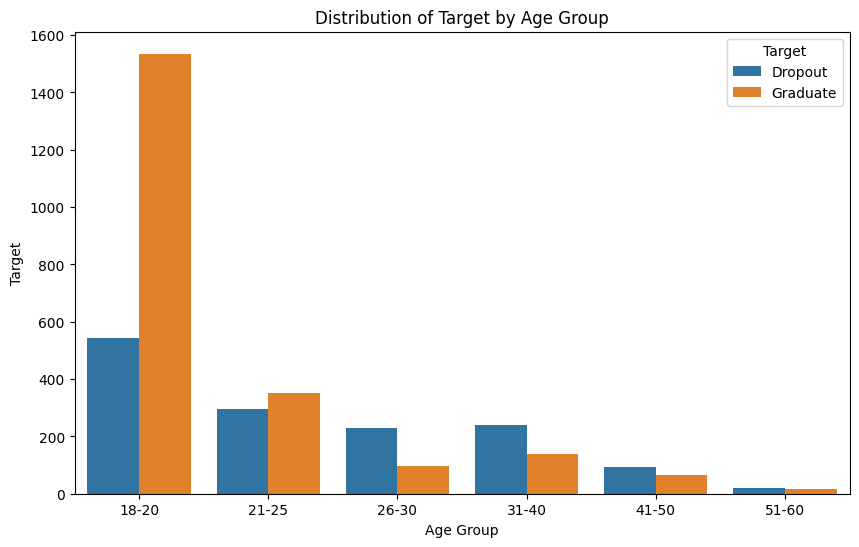

In [68]:
#The bar chart illustrates how the categories in the Target column are distributed across different age groups.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df_relevant, x='Age Group', hue='Target')
plt.title('Distribution of Target by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Target')
plt.show()

In [69]:
#The Chi-Square test checks if there is a significant relationship between age groups and outcomes in the Target column. It helps determine whether age influences the distribution of outcomes.
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(df_relevant['Age Group'], df_relevant['Target'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Value: {chi2}')
print(f'p-Value: {p}')
print(f'Degrees of Freedom: {dof}')


if p < 0.05:
    print("The hypothesis is rejected – there is a statistically significant difference.")
else:
    print("The hypothesis is not rejected – there is no statistically significant difference.")


Chi-Square Value: 414.44706347179925
p-Value: 2.2810032797216965e-87
Degrees of Freedom: 5
The hypothesis is rejected – there is a statistically significant difference.


*The Chi-Square test reveals a significant association between age group and academic outcome, but it does not directly indicate that older students have lower academic success.*



In [70]:
df_relevant = df[['Age at enrollment',
                  'Curricular units 1st sem (grade)',
                  'Curricular units 2nd sem (grade)',
                  'Target']]

df_relevant.head()

,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target
0,20,0.000000,0.000000,Dropout
1,19,14.000000,13.666667,Graduate
2,19,0.000000,0.000000,Dropout
3,20,13.428571,12.400000,Graduate
4,45,12.333333,13.000000,Graduate


In [71]:
df_relevant['Age Group'] = pd.cut(df_relevant['Age at enrollment'], bins=[17, 20, 25, 30, 40, 50, 60], labels=['18-20', '21-25', '26-30', '31-40', '41-50', '51-60'])


<ipython-input-71-a69fc34acf1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['Age Group'] = pd.cut(df_relevant['Age at enrollment'], bins=[17, 20, 25, 30, 40, 50, 60], labels=['18-20', '21-25', '26-30', '31-40', '41-50', '51-60'])


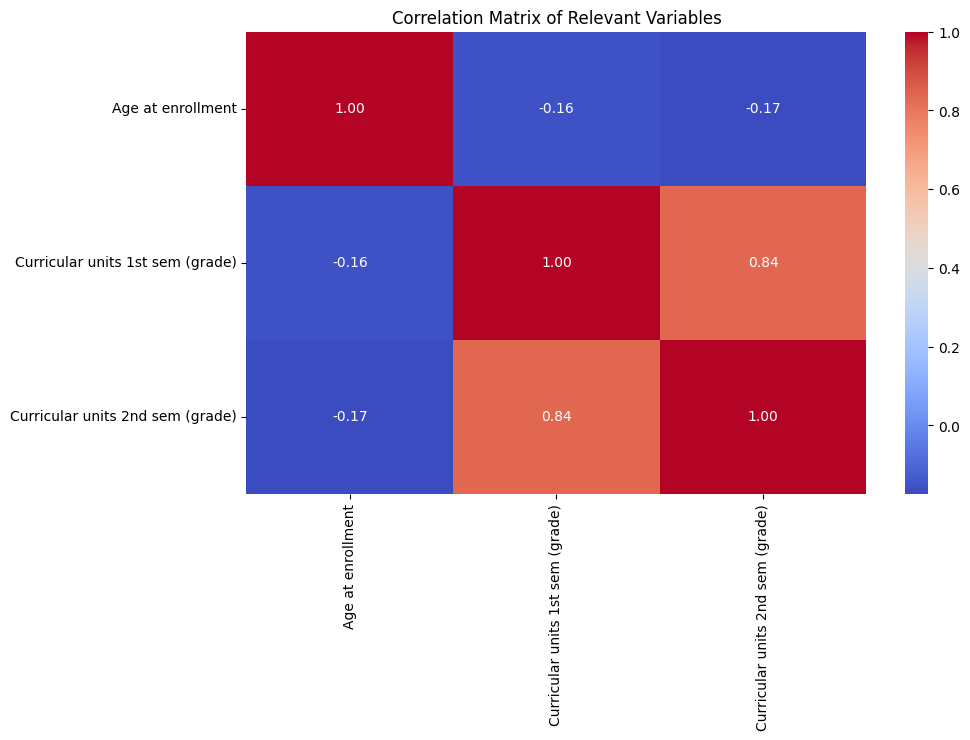

In [72]:
# This correlation matrix shows the relationships between the age at enrollment and the grades from the first and second semesters of curricular units.
# The values indicate the strength and direction of these correlations, helping to understand how these variables are interrelated.
corr_matrix = df_relevant[['Age at enrollment',
                           'Curricular units 1st sem (grade)',
                           'Curricular units 2nd sem (grade)',
                          ]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Relevant Variables')
plt.show()



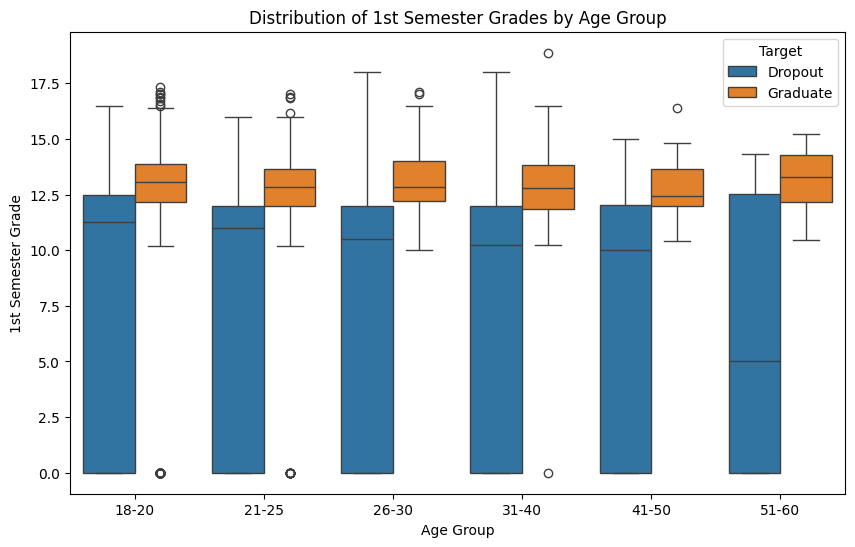

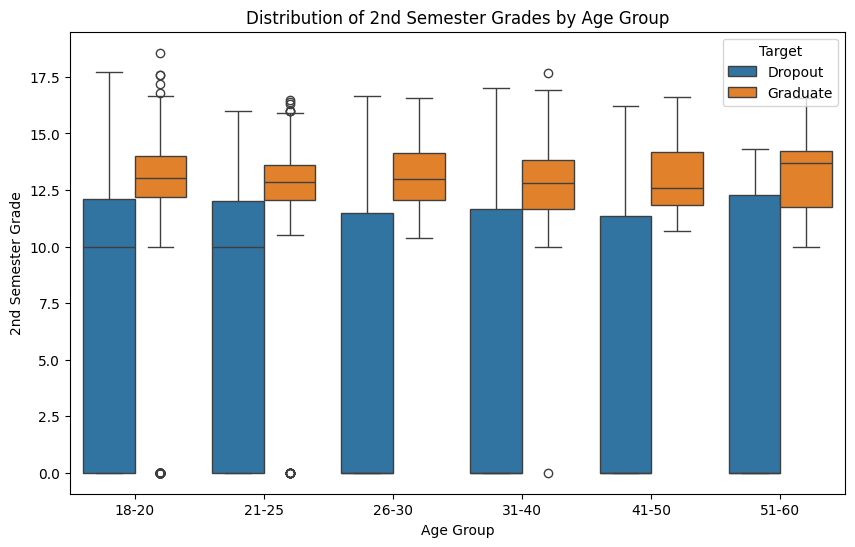

In [73]:
#These box plots show the distribution of grades in the first and second semesters across different age groups.
# They help analyze whether age has an impact on the grades, with variations observed based on student status.
df_relevant = df_relevant.drop(df_relevant[df_relevant['Target'] == 'Enrolled'].index)


plt.figure(figsize=(10, 6))
sns.boxplot(data=df_relevant, x='Age Group', y='Curricular units 1st sem (grade)', hue='Target')
plt.title('Distribution of 1st Semester Grades by Age Group')
plt.xlabel('Age Group')
plt.ylabel('1st Semester Grade')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=df_relevant, x='Age Group', y='Curricular units 2nd sem (grade)', hue='Target')
plt.title('Distribution of 2nd Semester Grades by Age Group')
plt.xlabel('Age Group')
plt.ylabel('2nd Semester Grade')
plt.show()

In [74]:
#We perform a One-Way ANOVA test to compare the mean grades in the first semester across different age groups.

import pandas as pd
from scipy import stats


groups = [group['Curricular units 1st sem (grade)'].values
          for _, group in df_relevant.groupby('Age Group')]


f_stat, p_value = stats.f_oneway(*groups)


print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")


if p_value < 0.05:
    print("There is a statistically significant difference between age groups.")
else:
    print("No statistically significant difference between age groups.")


ANOVA F-statistic: 34.00878996525615
P-value: 4.63131113406595e-34
There is a statistically significant difference between age groups.


<ipython-input-74-f21f83256a9c>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, group in df_relevant.groupby('Age Group')]


In [75]:
import pandas as pd
from scipy import stats

groups = [group['Curricular units 2nd sem (grade)'].values
          for _, group in df_relevant.groupby('Age Group')]


f_stat, p_value = stats.f_oneway(*groups)


print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")


if p_value < 0.05:
    print("There is a statistically significant difference between age groups.")
else:
    print("No statistically significant difference between age groups.")

ANOVA F-statistic: 42.76919847621345
P-value: 5.936915180754169e-43
There is a statistically significant difference between age groups.


<ipython-input-75-7c7b77eff753>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, group in df_relevant.groupby('Age Group')]


*Hypothesis 2: There are significant differences in dropout rates between genders, with males having a higher likelihood of dropping out compared to females.*

In [76]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/metodologijaDataSet.csv', delimiter=';')

In [77]:

df = df.drop(df[df['Target'] == 'Enrolled'].index)

In [78]:
df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421


In [79]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [80]:
contingency_table = pd.crosstab(df['Gender'], df['Target'])
print(contingency_table)


Target  Dropout  Graduate
Gender                   
0           720      1661
1           701       548


In [81]:

contingency_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
print(contingency_percentage)


Target    Dropout   Graduate
Gender                      
0       30.239395  69.760605
1       56.124900  43.875100


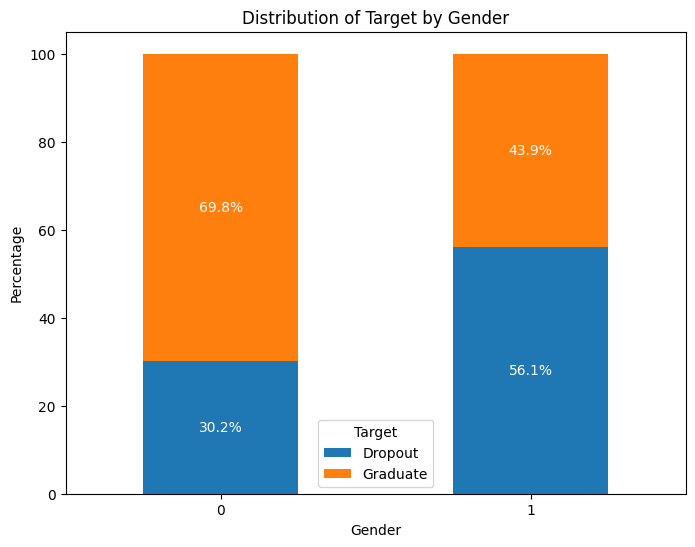

In [82]:
#This chart illustrates the distribution of dropout and graduation rates (Target) by gender, showing the percentage of students who dropped out and graduated for each gender group.
#It provides a gender-based comparison of these outcomes in a stacked bar format.
import matplotlib.pyplot as plt


ax = contingency_percentage.plot(kind='bar', stacked=True, figsize=(8, 6))


for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', color='white')


plt.title('Distribution of Target by Gender')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.legend(title='Target')
plt.xticks(rotation=0)
plt.savefig('/content/drive/MyDrive/target_by_gender.png')
plt.show()


In [83]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Value: {chi2}')
print(f'p-Value: {p}')
print(f'Degrees of Freedom: {dof}')


Chi-Square Value: 229.3515099719868
p-Value: 8.255973592335283e-52
Degrees of Freedom: 1


*The chi-square test results indicate a statistically significant relationship between gender and the likelihood of dropping out or graduating, as the p-value is much smaller than the 0.05 threshold. This suggests that gender has a significant impact on the outcomes (dropout or graduation) in the dataset.*

*Hypothesis 3: Nationality influences dropout rates, with foreign students experiencing higher dropout rates due to cultural and language barriers.*


In [84]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/metodologijaDataSet.csv', delimiter=';')

In [85]:
df_selected = df[['Nacionality', 'Target']]


In [86]:

df = df.drop(df[df['Target'] == 'Enrolled'].index)

In [87]:
#Tabela na kontigenost za nacionalnost i target kolonata koja gi broi studentite vo sekoja kombinacija
# Mapping of nationality numbers to names
nationality_map = {
    1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
    13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
    22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican', 26: 'Santomean',
    32: 'Turkish', 41: 'Brazilian', 62: 'Romanian', 100: 'Moldova',
    101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban',
    109: 'Colombian'
}

contingency_table = pd.crosstab(df['Nacionality'], df['Target'])


contingency_table_sorted = contingency_table.loc[contingency_table.sum(axis=1).sort_values(ascending=False).index]


contingency_table_sorted['Nationality'] = contingency_table_sorted.index.map(lambda x: f"{x} - {nationality_map.get(x, 'Unknown')}")


print(contingency_table_sorted)

Target       Dropout  Graduate        Nationality
Nacionality                                      
1               1389      2155     1 - Portuguese
41                14        18     41 - Brazilian
22                 4         8  22 - Cape Verdean
26                 1         8     26 - Santomean
6                  4         4        6 - Spanish
24                 1         4       24 - Guinean
11                 0         3       11 - Italian
103                1         2    103 - Ukrainian
2                  0         2         2 - German
100                2         0      100 - Moldova
101                1         1      101 - Mexican
25                 0         1    25 - Mozambican
21                 1         0       21 - Angolan
14                 0         1       14 - English
17                 1         0    17 - Lithuanian
13                 0         1         13 - Dutch
62                 0         1      62 - Romanian
105                1         0      105 - Russian


In [88]:
# Mapping of nationality numbers to names
nationality_map = {
    1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
    13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
    22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican', 26: 'Santomean',
    32: 'Turkish', 41: 'Brazilian', 62: 'Romanian', 100: 'Moldova',
    101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban',
    109: 'Colombian'
}

# Assuming 'contingency_percentage_sorted' is already calculated and has the numeric index (nationality numbers)
# Create a new column that combines the nationality number and name
contingency_table_sorted['Nationality'] = contingency_table_sorted.index.map(lambda x: f"{x} - {nationality_map.get(x, 'Unknown')}")

# Print the updated table
print(contingency_table_sorted)


Target       Dropout  Graduate        Nationality
Nacionality                                      
1               1389      2155     1 - Portuguese
41                14        18     41 - Brazilian
22                 4         8  22 - Cape Verdean
26                 1         8     26 - Santomean
6                  4         4        6 - Spanish
24                 1         4       24 - Guinean
11                 0         3       11 - Italian
103                1         2    103 - Ukrainian
2                  0         2         2 - German
100                2         0      100 - Moldova
101                1         1      101 - Mexican
25                 0         1    25 - Mozambican
21                 1         0       21 - Angolan
14                 0         1       14 - English
17                 1         0    17 - Lithuanian
13                 0         1         13 - Dutch
62                 0         1      62 - Romanian
105                1         0      105 - Russian


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

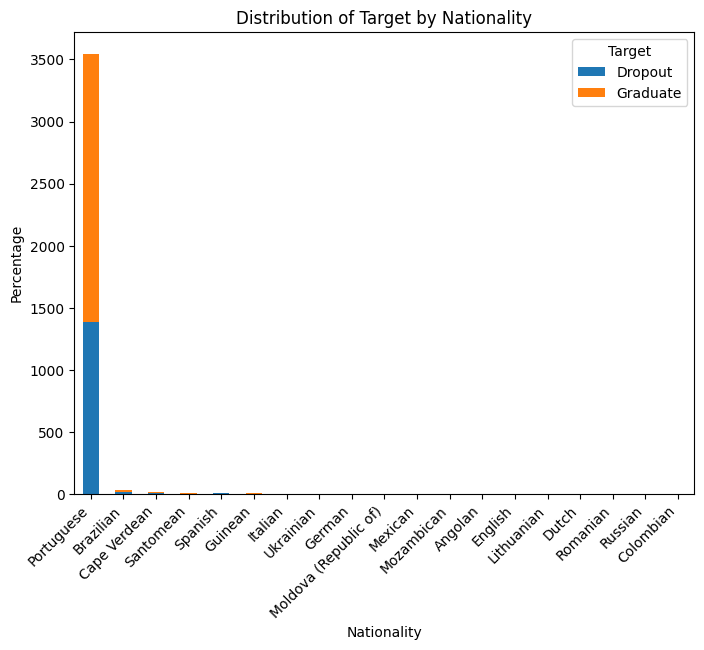

In [90]:
# Bar chart za prikaz na studentite po nacionalnost i kategorija na Target kolonata

import matplotlib.pyplot as plt

# Example Data
# Let's assume contingency_percentage is a pandas DataFrame
# with 'Nationality' as the index (numeric values) and 'Target' as columns.

# Nationality map
nationality_map = {
    1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
    13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
    22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican', 26: 'Santomean',
    32: 'Turkish', 41: 'Brazilian', 62: 'Romanian', 100: 'Moldova (Republic of)',
    101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban',
    109: 'Colombian'
}

# Replace the numeric index with the corresponding nationality names
contingency_table_sorted.index = contingency_table_sorted.index.map(nationality_map)

# Plot the stacked bar chart
contingency_table_sorted.plot(kind='bar', stacked=True, figsize=(8, 6))

# Title and labels
plt.title('Distribution of Target by Nationality')
plt.ylabel('Percentage')
plt.xlabel('Nationality')

# Update x-ticks with rotated labels for readability
plt.xticks(rotation=45, ha='right')

# Show legend with the title 'Target'
plt.legend(title='Target')


# Show the plot
plt.show()


In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
# Chi-Square test za proverka dali postoi znacajna zavisnost pomegju nacionalnosta i statusot na otpisuvanje (Dropout)
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Value: {chi2}')
print(f'p-Value: {p}')
print(f'Degrees of Freedom: {dof}')

Chi-Square Value: 19.85080637963916
p-Value: 0.34128154540789707
Degrees of Freedom: 18


Hypotheses regarding the impact of socio-economic factors


Hypothesis 1: Students with debtor status are less likely to graduate due to financial stress.

In [93]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/metodologijaDataSet.csv', delimiter=';')
df


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [94]:
df.Target.value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


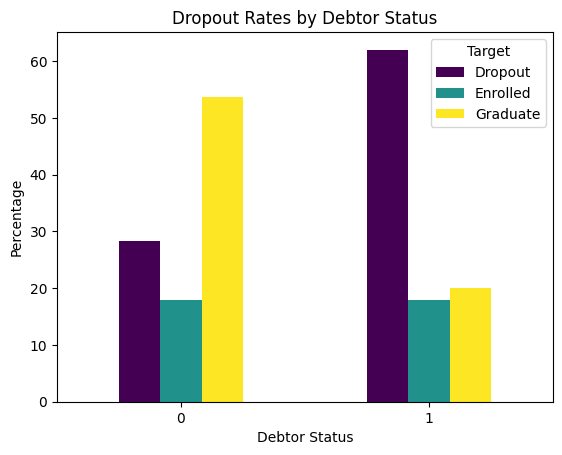

In [97]:
# Create a contingency table
contingency_table = pd.crosstab(df['Debtor'], df['Target'], normalize='index') * 100

# Plot stacked bar chart
contingency_table.plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Dropout Rates by Debtor Status')
plt.xlabel('Debtor Status')
plt.ylabel('Percentage')
plt.legend(title='Target')
plt.xticks(rotation=0)
plt.show()


In [98]:
# Calculate dropout rates for each debtor status
dropout_rates = contingency_table['Dropout']

# Calculate the percentage difference
percentage_difference = ((dropout_rates[1] - dropout_rates[0]) / dropout_rates[0]) * 100

# Print the result
print(f"Percentage difference in dropout rates: {percentage_difference:.2f}%")


Percentage difference in dropout rates: 119.31%


In [99]:
# Perform Chi-square test
contingency_table = pd.crosstab(df['Debtor'], df['Target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

if p < 0.05:
    print("\nReject the null hypothesis")
else:
    print("\nFail to reject the null hypothesis")


Chi-Square Statistic: 259.33321964832965
p-value: 4.858552123231672e-57
Degrees of Freedom: 2
Expected Frequencies:
[[1259.43512658  703.72377939 1957.84109403]
 [ 161.56487342   90.27622061  251.15890597]]

Reject the null hypothesis


Hypothesis 2: There is a significant association between Scholarship holder and Graduation (Target)

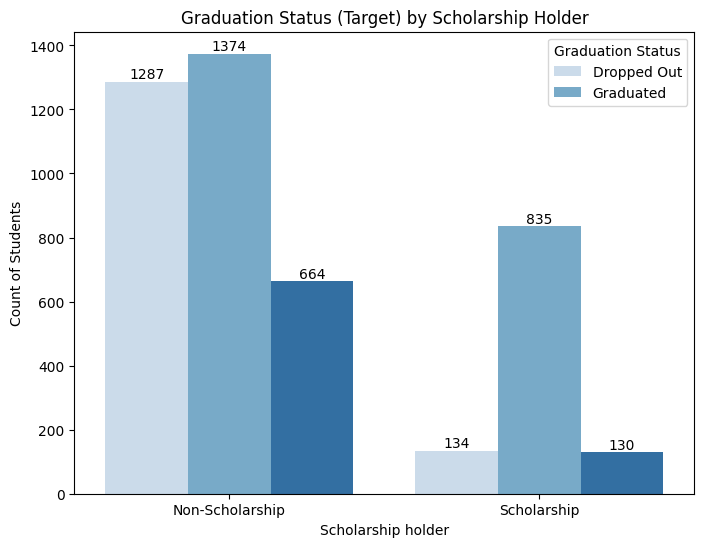

([<matplotlib.axis.YTick at 0x7bf26a529950>,
 [Text(0, 0.5, 'Non-Scholarship'), Text(0, 1.5, 'Scholarship')])

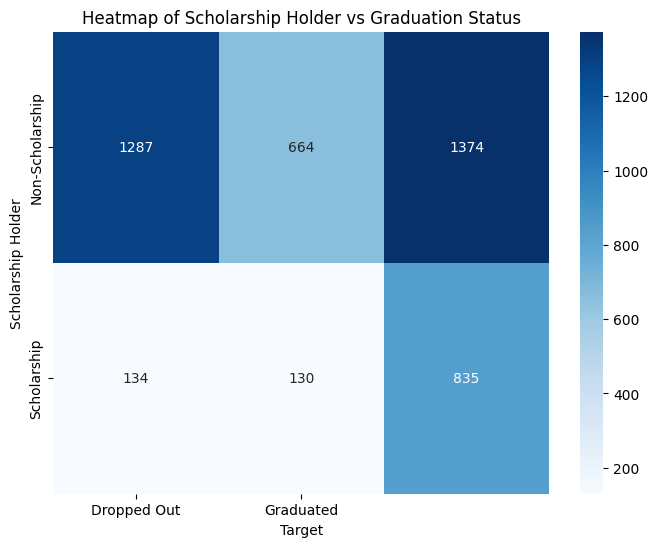

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Scholarship holder'], df['Target'])

# Set up the figure
plt.figure(figsize=(8, 6))

# Create the countplot
ax = sns.countplot(x='Scholarship holder', hue='Target', data=df, palette='Blues')

# Add counts on top of each bar
for container in ax.containers:
    # Loop through each bar in the container
    ax.bar_label(container, fmt='%d', label_type='edge')

# Set plot details
plt.title('Graduation Status (Target) by Scholarship Holder')
plt.ylabel('Count of Students')
plt.xticks([0, 1], ['Non-Scholarship', 'Scholarship'])
plt.legend(title='Graduation Status', labels=['Dropped Out', 'Graduated'])

# Show the plot
plt.show()

plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=True)

# Add labels and title
plt.title('Heatmap of Scholarship Holder vs Graduation Status')
plt.ylabel('Scholarship Holder')
plt.xticks([0.5, 1.5], ['Dropped Out', 'Graduated'])  # Rename x-axis labels
plt.yticks([0.5, 1.5], ['Non-Scholarship', 'Scholarship'])  # Rename y-axis labels


In [101]:
# Given dropout rates
dropout_rate_scholarship = 13.83
dropout_rate_non_scholarship = 48.35

# Calculate the percentage difference in dropout rates
percentage_difference_dropout = ((dropout_rate_scholarship - dropout_rate_non_scholarship) / dropout_rate_non_scholarship) * 100
percentage_difference_dropout


-71.39607032057911

In [102]:
contingency_table = pd.crosstab(df['Scholarship holder'], df['Target'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Expected values:\n{expected}")

# Interpretation of p-value
if p_value < 0.05:
    print("There is a significant association between Scholarship holder and Graduation (Target).")
else:
    print("There is no significant association between Scholarship holder and Graduation (Target).")

Chi-square statistic: 409.94
P-value: 0.0000
Degrees of freedom: 2
Expected values:
[[1067.99841772  596.75632911 1660.24525316]
 [ 353.00158228  197.24367089  548.75474684]]
There is a significant association between Scholarship holder and Graduation (Target).


In [103]:
print(contingency_table)

Target              Dropout  Enrolled  Graduate
Scholarship holder                             
0                      1287       664      1374
1                       134       130       835


Hypothesis 3:
**Students with higher previous qualifications (e.g., higher grades from high school) achieve better results in the current program.**

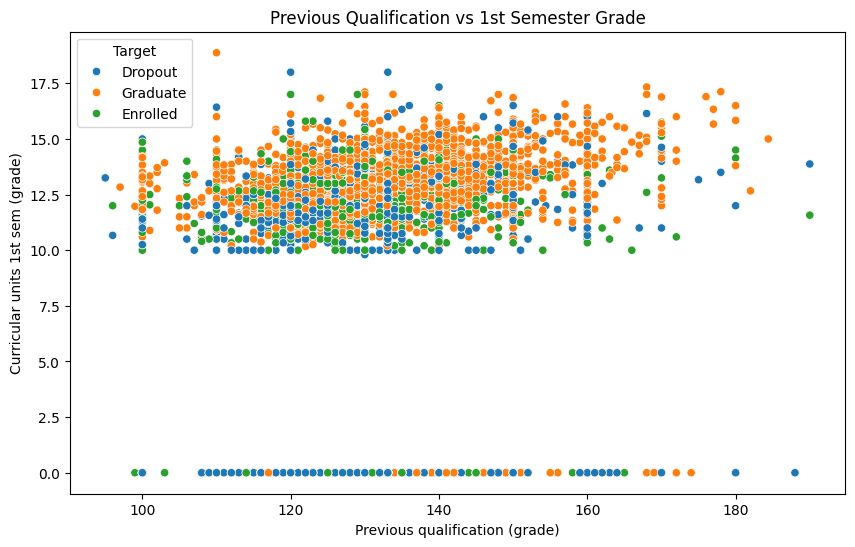

Pearson Correlation Coefficient: 0.059
p-value: 0.00008


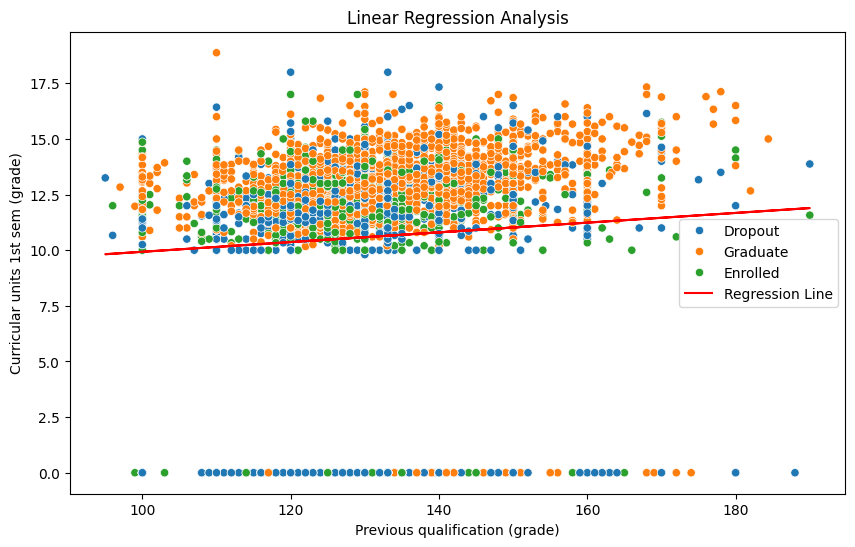

Linear Regression Coefficient: 0.022
Intercept: 7.746
R-squared: 0.004


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np


# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Previous qualification (grade)', y='Curricular units 1st sem (grade)', hue='Target')
plt.title('Previous Qualification vs 1st Semester Grade')
plt.xlabel('Previous qualification (grade)')
plt.ylabel('Curricular units 1st sem (grade)')
plt.legend(title='Target')

plt.show()

# Pearson Correlation Test
x = df['Previous qualification (grade)']
y = df['Curricular units 1st sem (grade)']
correlation_coefficient, p_value = pearsonr(x, y)
print(f'Pearson Correlation Coefficient: {correlation_coefficient:.3f}')
print(f'p-value: {p_value:.5f}')

# Linear Regression
x_reshaped = x.values.reshape(-1, 1)
y_reshaped = y.values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(x_reshaped, y_reshaped)

# Regression Line Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Previous qualification (grade)', y='Curricular units 1st sem (grade)', hue='Target')
plt.plot(x, regressor.predict(x_reshaped), color='red', label='Regression Line')
plt.title('Linear Regression Analysis')
plt.xlabel('Previous qualification (grade)')
plt.ylabel('Curricular units 1st sem (grade)')
plt.legend()

plt.show()

# Print regression details
print(f'Linear Regression Coefficient: {regressor.coef_[0][0]:.3f}')
print(f'Intercept: {regressor.intercept_[0]:.3f}')
print(f'R-squared: {regressor.score(x_reshaped, y_reshaped):.3f}')
